In [1]:
import os
import tarfile
import urllib
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("/home/harikrishna/datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:

housing = load_housing_data()

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: xlabel='ocean_proximity'>

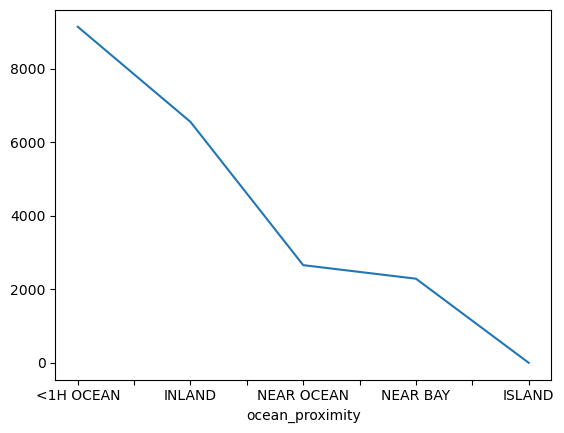

In [10]:
housing['ocean_proximity'].value_counts().plot()

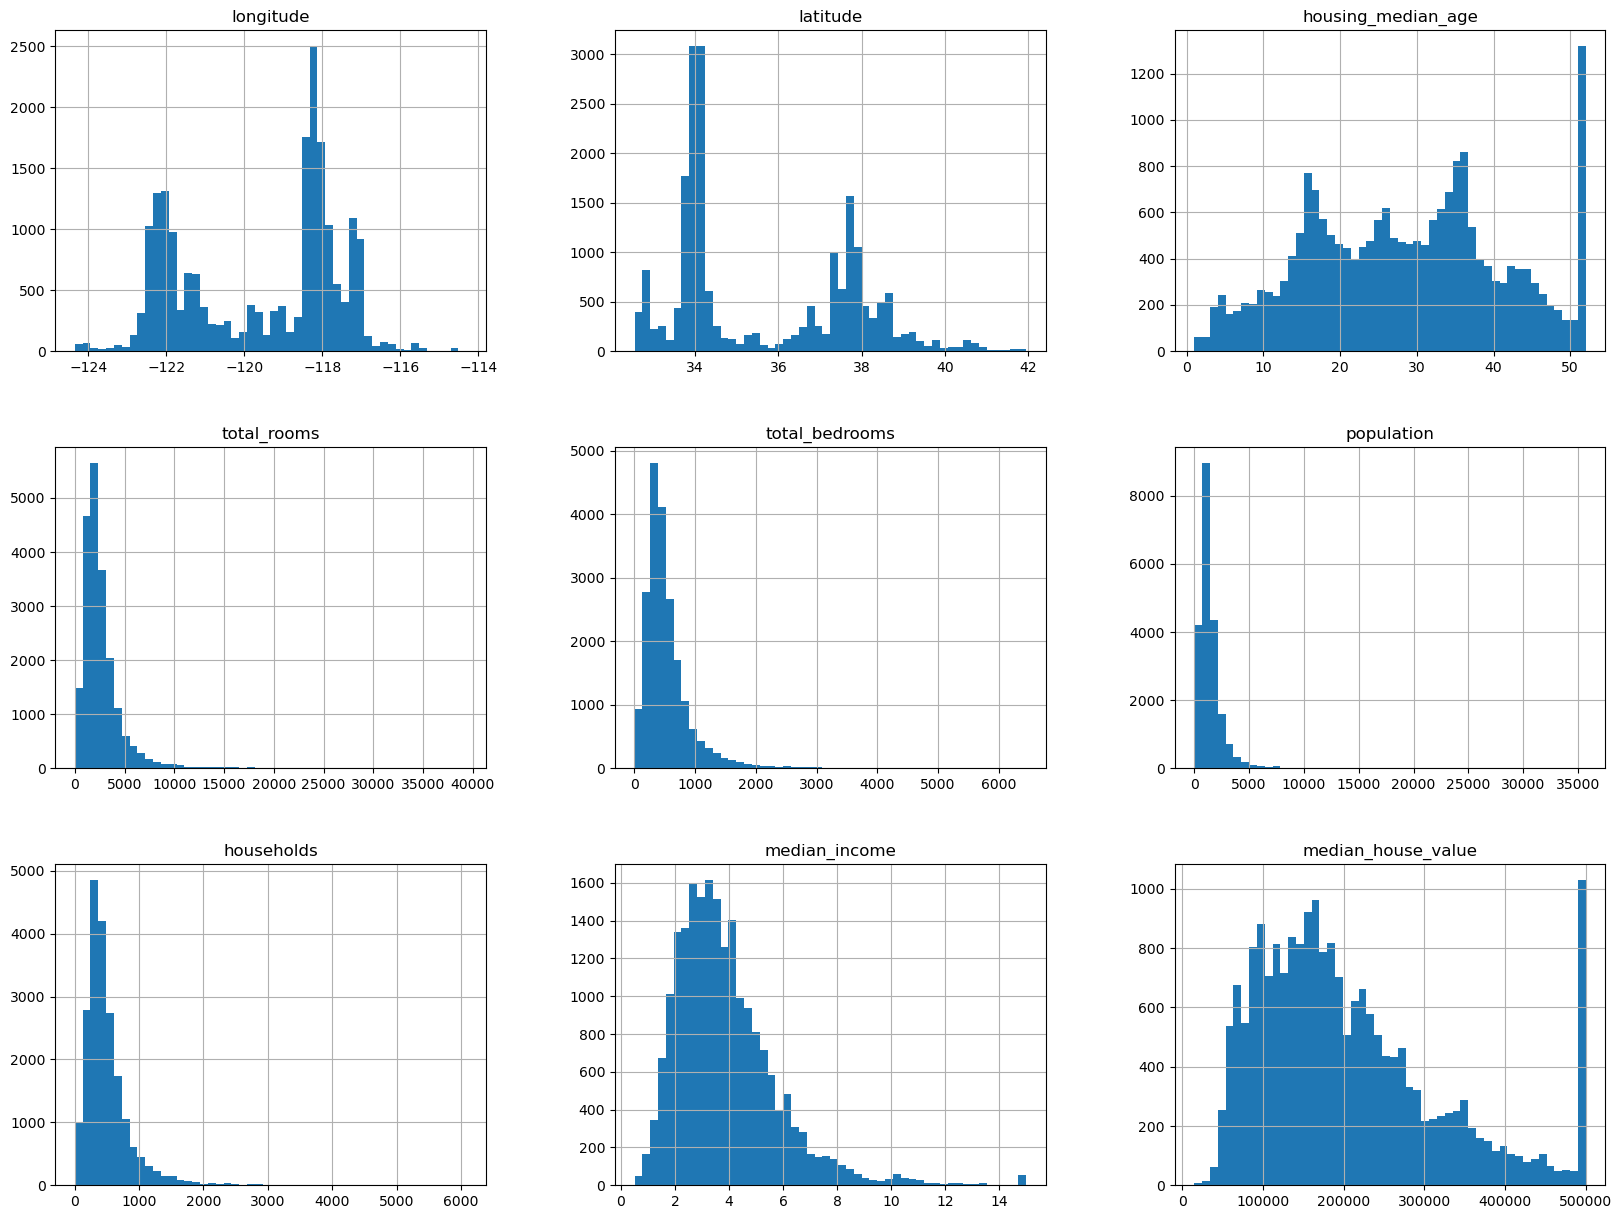

In [11]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=24)

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<Axes: >

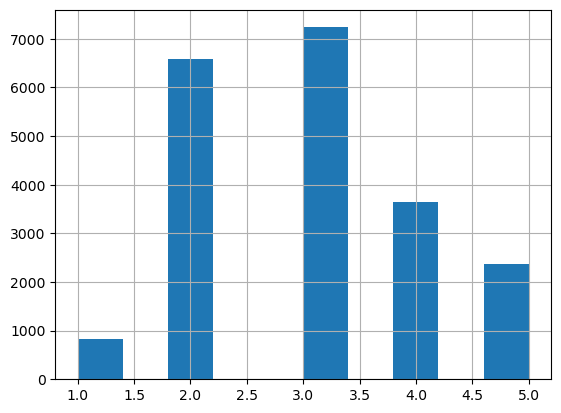

In [16]:
housing["income_cat"].hist()

In [17]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=24)

In [18]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)*100

income_cat
3    35.053295
2    31.879845
4    17.635659
5    11.434109
1     3.997093
Name: count, dtype: float64

In [20]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)*100

income_cat
3    35.059351
2    31.885901
4    17.629603
5    11.446221
1     3.978924
Name: count, dtype: float64

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [22]:
housing = strat_train_set.copy()

#### Visualizing Geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

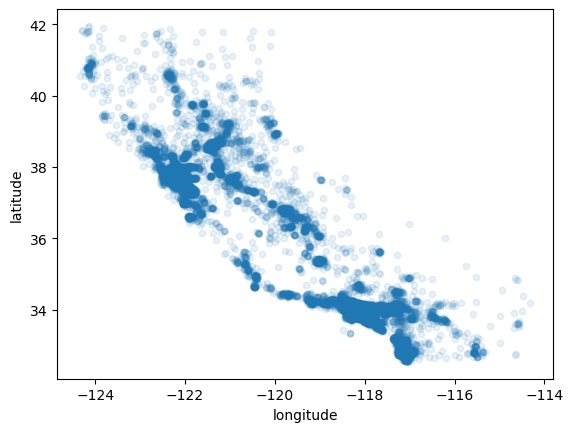

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

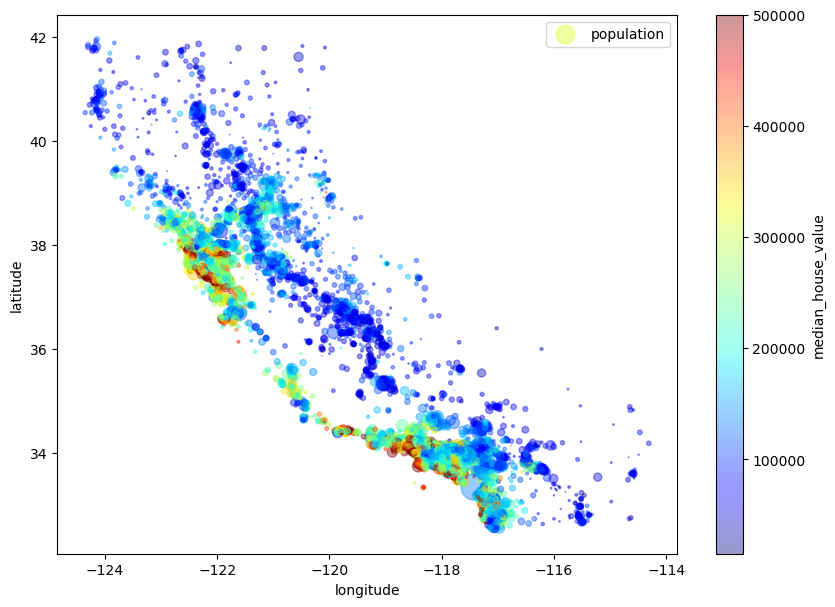

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [25]:
corr_matrix = housing.corr(numeric_only=True)

In [26]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690035
total_rooms           0.136261
housing_median_age    0.101454
households            0.067924
total_bedrooms        0.052024
population           -0.019773
longitude            -0.044723
latitude             -0.145020
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

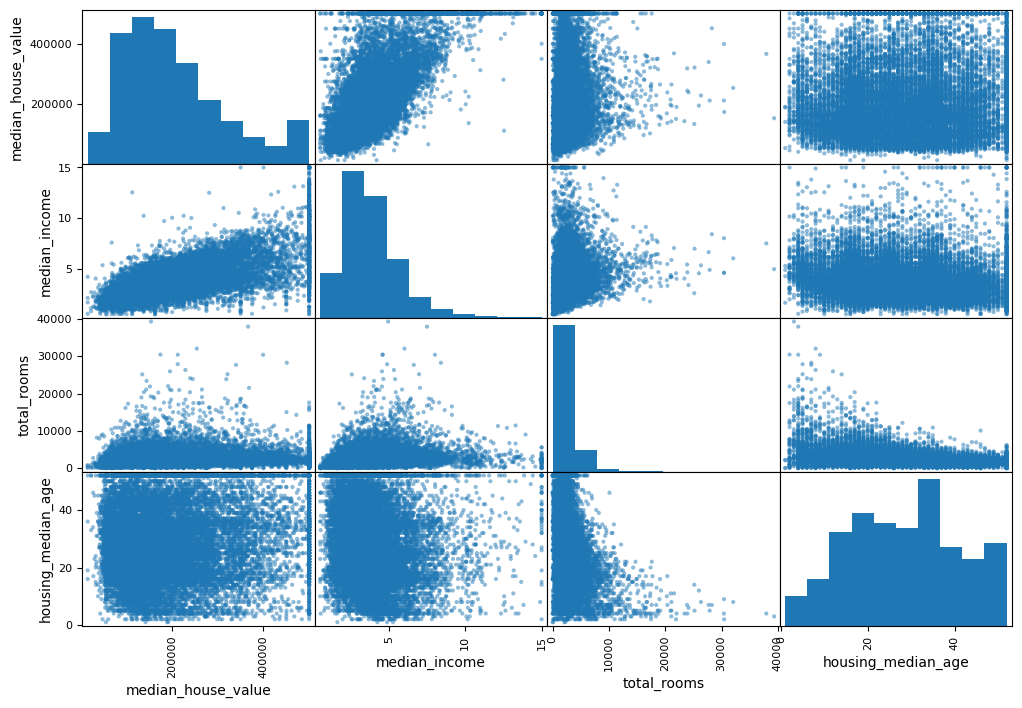

In [27]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

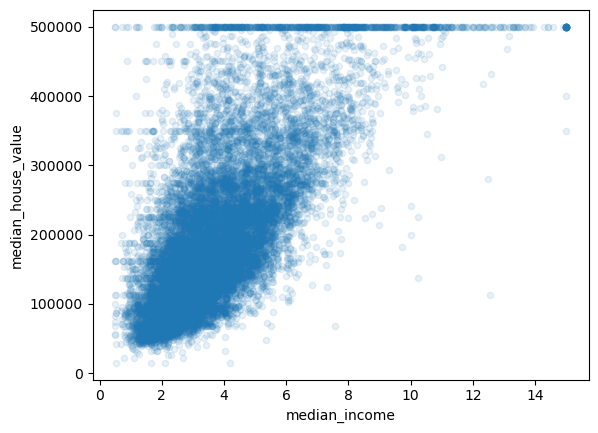

In [28]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

#### Experimenting with Attribute Combinations


In [29]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [30]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690035
rooms_per_household         0.144192
total_rooms                 0.136261
housing_median_age          0.101454
households                  0.067924
total_bedrooms              0.052024
population                 -0.019773
population_per_household   -0.021875
longitude                  -0.044723
latitude                   -0.145020
bedrooms_per_room          -0.254996
Name: median_house_value, dtype: float64

In [31]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [32]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3599,-118.50,34.24,34.0,2634.0,412.0,1114.0,423.0,5.9401,<1H OCEAN
9707,-121.65,36.67,52.0,2351.0,459.0,1169.0,439.0,2.8924,<1H OCEAN
3631,-118.43,34.23,35.0,2049.0,390.0,1286.0,385.0,4.4432,<1H OCEAN
11688,-118.00,33.88,18.0,2628.0,720.0,2276.0,649.0,2.7350,<1H OCEAN
5642,-118.31,33.74,36.0,2464.0,472.0,1111.0,457.0,4.5074,NEAR OCEAN


In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [34]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [35]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([-118.49   ,   34.25   ,   29.     , 2127.     ,  436.     ,
       1167.     ,  411.     ,    3.53285])

In [37]:
X = imputer.transform(housing_num)

#### Handling Text and Categorical Attributes


In [38]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
3599,<1H OCEAN
9707,<1H OCEAN
3631,<1H OCEAN
11688,<1H OCEAN
5642,NEAR OCEAN
12575,INLAND
6542,<1H OCEAN
2766,INLAND
9059,INLAND
17891,<1H OCEAN


In [39]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]])

In [40]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [41]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [42]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Custom Transformers

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [45]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [46]:
cat_encoder

OneHotEncoder()

### Select and Train a Model

Training and Evaluating on the Training Set

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [48]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68189.38468905378

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [50]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Better Evaluation Using Cross-Validation

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [53]:
display_scores(tree_rmse_scores)

Scores: [73750.71713885 69635.72823728 67411.92219981 69249.7077121
 72342.95109592 71458.7664549  69936.36909296 69477.15526162
 70806.16745147 70358.03273264]
Mean: 70442.7517377549
Standard deviation: 1678.5200473971304


In [54]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68186.33161616 72889.48098714 63872.54033145 64191.00350127
 68325.66745284 68179.74531546 66294.32499475 73407.70274728
 70819.94552172 69030.83421187]
Mean: 68519.75766799517
Standard deviation: 3067.4141702055745


In [55]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52051.99146117 50052.62767307 46410.11000301 46445.3239772
 49514.14960035 51411.34615243 50198.53421387 51184.86572077
 51946.97855427 50398.13746707]
Mean: 49961.406482320395
Standard deviation: 1932.4100487947412


### Exercise 1

Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyperparameters, such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don’t worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [56]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="linear")

svm_scores = cross_val_score(svm_poly_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=5)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [114774.76724015 106591.52700018 113095.05395882 112800.03001603
 113138.194878  ]
Mean: 112079.91461863779
Standard deviation: 2830.3236731886905


In [57]:
svm_poly_reg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [58]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import reciprocal, uniform
param_grid = [{"C": range(1, 10)}]
svm_poly_reg = SVR(kernel="linear")

grid_search = GridSearchCV(svm_poly_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid=[{'C': range(1, 10)}], return_train_score=True,
             scoring='neg_mean_squared_error')

In [59]:
grid_search.best_params_

{'C': 9}

In [60]:
grid_search.best_estimator_

SVR(C=9, kernel='linear')

In [61]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

112115.64562101112 {'C': 1}
106759.35657584385 {'C': 2}
102075.49665672127 {'C': 3}
98103.63203086446 {'C': 4}
94787.75715318786 {'C': 5}
91945.31115174614 {'C': 6}
89509.33433682639 {'C': 7}
87367.836957633 {'C': 8}
85686.47237600618 {'C': 9}


We can observe that, test accuracy is decreasing as we are increasing value of C lets try more bigger values of C

In [62]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import reciprocal, uniform
param_grid = [{"C": [10,100,1000]}]
svm_poly_reg = SVR(kernel="linear")

grid_search = GridSearchCV(svm_poly_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid=[{'C': [10, 100, 1000]}], return_train_score=True,
             scoring='neg_mean_squared_error')

In [63]:
grid_search.best_params_

{'C': 1000}

In [64]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

84194.3995127805 {'C': 10}
71240.53687244997 {'C': 100}
70027.14902889839 {'C': 1000}


We can see that there is not much difference between the score we got for C = 100 and 1000 therefore C=100 is fine Still this is not good as compared to our previously trained models

Lets try kernel as 'rbf' and hyperparameter tuning for C and gama

In [65]:
param_grid = [{"C": [10,100,1000],"gamma":[0.001,0.01,0.1]}]
svm_poly_reg = SVR(kernel="rbf")

grid_search = GridSearchCV(svm_poly_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,verbose =True)

grid_search.fit(housing_prepared, housing_labels)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [10, 100, 1000], 'gamma': [0.001, 0.01, 0.1]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [66]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.1}

In [67]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

118379.09972326003 {'C': 10, 'gamma': 0.001}
117621.39117062367 {'C': 10, 'gamma': 0.01}
116151.63645775215 {'C': 10, 'gamma': 0.1}
117427.03420318587 {'C': 100, 'gamma': 0.001}
110149.53389015612 {'C': 100, 'gamma': 0.01}
100442.1776324455 {'C': 100, 'gamma': 0.1}
108641.15887373757 {'C': 1000, 'gamma': 0.001}
80078.86264342195 {'C': 1000, 'gamma': 0.01}
73311.72780612893 {'C': 1000, 'gamma': 0.1}


2nd Round of Hyperparameter Tuning

In [68]:
param_grid = [{"C": [10000,100000],"gamma":[0.1,0.5,1.0]}]
svm_poly_reg = SVR(kernel="rbf")

grid_search = GridSearchCV(svm_poly_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,verbose =True)

grid_search.fit(housing_prepared, housing_labels)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [10000, 100000], 'gamma': [0.1, 0.5, 1.0]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [69]:
grid_search.best_params_

{'C': 100000, 'gamma': 0.5}

In [70]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

61334.02043390203 {'C': 10000, 'gamma': 0.1}
66091.68564990503 {'C': 10000, 'gamma': 0.5}
77121.34350100295 {'C': 10000, 'gamma': 1.0}
56626.65460180763 {'C': 100000, 'gamma': 0.1}
56132.128044029494 {'C': 100000, 'gamma': 0.5}
60483.579765297814 {'C': 100000, 'gamma': 1.0}


In [71]:
final_model = grid_search.best_estimator_

In [72]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

In [73]:
final_rmse = np.sqrt(final_mse)
final_rmse

54954.86946098476

Conclusion Exercise 1

Using SVM with hyperparameter C = 100000 and gamma = 0.5 , we have the best model with final rmse score on test set of 54954.86946098476

#### Exercise 2

replacing GridSearchCV with RandomizedSearchCV.

In [74]:
# param_grid = [{"C": [10000,100000],"gamma":[0.1,0.5,1.0]}]
# svm_poly_reg = SVR(kernel="rbf")

# grid_search = GridSearchCV(svm_poly_reg, param_grid, cv=3,
#                            scoring='neg_mean_squared_error',
#                            return_train_score=True,verbose =True)

# grid_search.fit(housing_prepared, housing_labels)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.1,1), "C": uniform(10000, 100000)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42,scoring='neg_mean_squared_error')
rnd_search_cv.fit(housing_prepared, housing_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......C=47454.01188473625, gamma=0.8927180304353626; total time=   9.9s
[CV] END ......C=47454.01188473625, gamma=0.8927180304353626; total time=   9.3s
[CV] END ......C=47454.01188473625, gamma=0.8927180304353626; total time=  15.7s
[CV] END ......C=83199.39418114051, gamma=0.3968793330444371; total time=  13.9s
[CV] END ......C=83199.39418114051, gamma=0.3968793330444371; total time=  11.9s
[CV] END ......C=83199.39418114051, gamma=0.3968793330444371; total time=  12.9s
[CV] END .....C=25601.86404424365, gamma=0.14321698289111517; total time=   7.6s
[CV] END .....C=25601.86404424365, gamma=0.14321698289111517; total time=   7.6s
[CV] END .....C=25601.86404424365, gamma=0.14321698289111517; total time=   7.6s
[CV] END .....C=15808.361216819947, gamma=0.7348118405270448; total time=   7.7s
[CV] END .....C=15808.361216819947, gamma=0.7348118405270448; total time=   7.5s
[CV] END .....C=15808.361216819947, gamma=0.7348

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f2a4762c2d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f2a4747b850>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [75]:
rnd_search_cv.best_estimator_

SVR(C=93244.26408004218, gamma=0.1630568734622147)

In [76]:
cvres = rnd_search_cv.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62306.56159438644 {'C': 47454.01188473625, 'gamma': 0.8927180304353626}
55827.09711392268 {'C': 83199.39418114051, 'gamma': 0.3968793330444371}
58176.9903676348 {'C': 25601.86404424365, 'gamma': 0.14321698289111517}
67349.8407498063 {'C': 15808.361216819947, 'gamma': 0.7348118405270448}
56928.0097015569 {'C': 70111.50117432087, 'gamma': 0.5105903209394755}
73888.35234222932 {'C': 12058.449429580245, 'gamma': 0.9330606024425666}
55585.03405330508 {'C': 93244.26408004218, 'gamma': 0.1630568734622147}
57851.73856070453 {'C': 28182.496720710064, 'gamma': 0.15254729458052607}
56971.141914210166 {'C': 40424.22429595377, 'gamma': 0.3347776308515933}
56267.72282841279 {'C': 53194.501864211576, 'gamma': 0.19553708662745248}


### Conclusion Exercise 2
Using RandomSearchCV on SVM with hyperparameter C = 93244 and gamma = 0.16305 , 
we have the best model with final rmse score on test set of 55585.03405330508 